### Import Libraries


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

# Gym Customers Features and Churn Dataset

## Overview
This dataset contains information about gym customers, including demographic details, membership behavior, and attendance frequency.  
The main goal is to **predict customer churn (dropout)** — whether a customer will stop attending the gym or continue their membership.

---

## Dataset Details

- **Source**: [Kaggle – Gym Customers Features and Churn](https://www.kaggle.com/datasets/adrianvinueza/gym-customers-features-and-churn)  
- **Rows**: ~4000 records  
- **Columns**: 14 features + 1 target (`churn`)  

---

## Features Description

### Demographic and General Info
- `gender`: Gender of the customer (Male/Female).  
- `near_location`: Whether the customer lives near the gym (1 = Yes, 0 = No).  
- `partner`: Whether the customer joined via a partnership program.  
- `promo_friends`: Whether the customer joined due to a friends’ promotion.  
- `phone`: Whether the customer provided a phone number (1/0).  
- `group_visits`: Whether the customer visits in groups (1/0).  
- `contract_period`: Duration of the contract in months.  
- `age`: Age of the customer.

### Usage and Attendance Behavior
- `avg_class_frequency_total`: Average frequency of class attendance during the entire membership.  
- `avg_class_frequency_current_month`: Average attendance frequency in the current month.  
- `avg_additional_charges_total`: Average additional charges (e.g., extra services or products purchased).  
- `month_to_end_contract`: Months left until contract expiration.  
- `lifetime`: Total duration (in days) the customer has been with the gym.

---

## Target Variable
- `churn`: Binary target variable (0 = Active customer, 1 = Churned customer).

---

## Use Cases
- Predicting **dropout risk** for gym members.  
- Analyzing **attendance frequency** and **membership behavior** to improve customer retention.  
- Visualizing patterns between demographics, usage, and churn.


### Load Datasets 

In [3]:
data = pd.read_csv("C:/Users/Mohamed Mahmoud/Desktop/gym_churn_us.csv")

## Data Inspection

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## Features Selection

# Features Description

### Avg_class_frequency_total
Average number of classes attended by the customer over their entire membership.

### Avg_class_frequency_current_month
Average number of classes attended by the customer in the current month.

### Lifetime
Total time (in months) the customer has been a gym member.

### Avg_additional_charges_total
Average amount of additional charges spent by the customer on extra services.

---

# Target

### Churn
Indicates whether the customer has dropped out (1) or is still active (0).


In [7]:
features = [
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Lifetime',
    'Avg_additional_charges_total'
]
target = 'Churn'

selected_data = data[features + [target]]

selected_data.head()


,Avg_class_frequency_total,Avg_class_frequency_current_month,Lifetime,Avg_additional_charges_total,Churn
0,0.020398,0.000000,3,14.227470,0
1,1.922936,1.910244,7,113.202938,0
2,1.859098,1.736502,2,129.448479,0
3,3.205633,3.357215,2,62.669863,0
4,1.113884,1.120078,3,198.362265,0


## 1. Overview of the Data

In this step, we check:
- The shape of the dataset (rows and columns).
- The data types of each feature (numerical or categorical).
- The presence of any missing values.

This helps us understand the structure of the data before proceeding with analysis.


In [8]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Avg_class_frequency_total          4000 non-null   float64
 1   Avg_class_frequency_current_month  4000 non-null   float64
 2   Lifetime                           4000 non-null   int64  
 3   Avg_additional_charges_total       4000 non-null   float64
 4   Churn                              4000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 156.4 KB


## 2. Basic Statistics

Here we calculate basic statistics for the numerical features:
- Minimum, Maximum, Mean, Median, and Standard Deviation.

This provides insights into the data distribution and scale.


In [9]:
selected_data[features].describe().T


,count,mean,std,min,25%,50%,75%,max
Avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
Avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783
Lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740


In [10]:
selected_data.isnull().sum()

Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Lifetime                             0
Avg_additional_charges_total         0
Churn                                0
dtype: int64

## 3. Distribution of Features

We plot the distribution (histogram + KDE) for each numerical feature
to visualize how the data is spread and detect skewness or outliers.


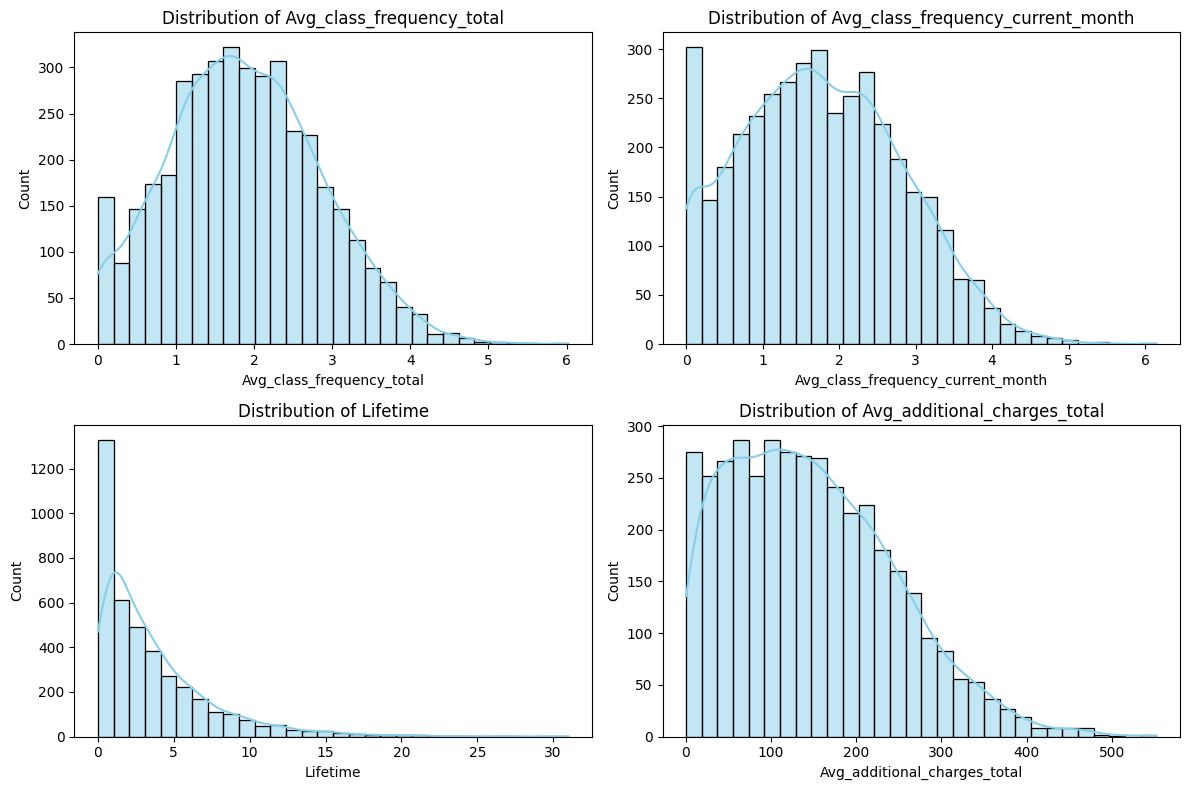

In [11]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(selected_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## 4. Relationship Between Features and Target (Churn)

We use boxplots to compare each feature's values between churned (1) 
and active (0) customers. This helps identify patterns and differences.


C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_12340\3796154664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=selected_data, palette='Set2')
C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_12340\3796154664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=selected_data, palette='Set2')
C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_12340\3796154664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=selected_data, palette='Set2')
C:\Users\Mohamed

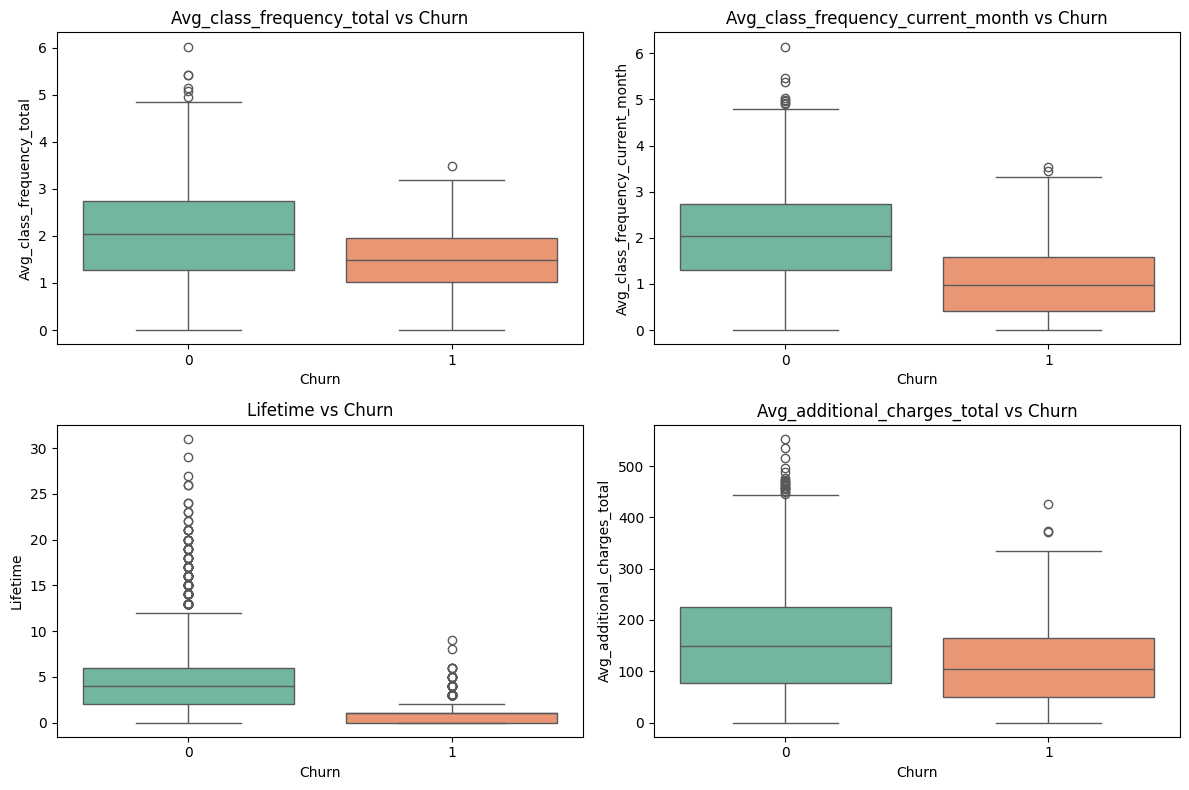

In [12]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=col, data=selected_data, palette='Set2')
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


## 5. Correlation Between Features

We create a heatmap to show correlations between features and with the target.
High correlation can indicate strong relationships or redundancy.


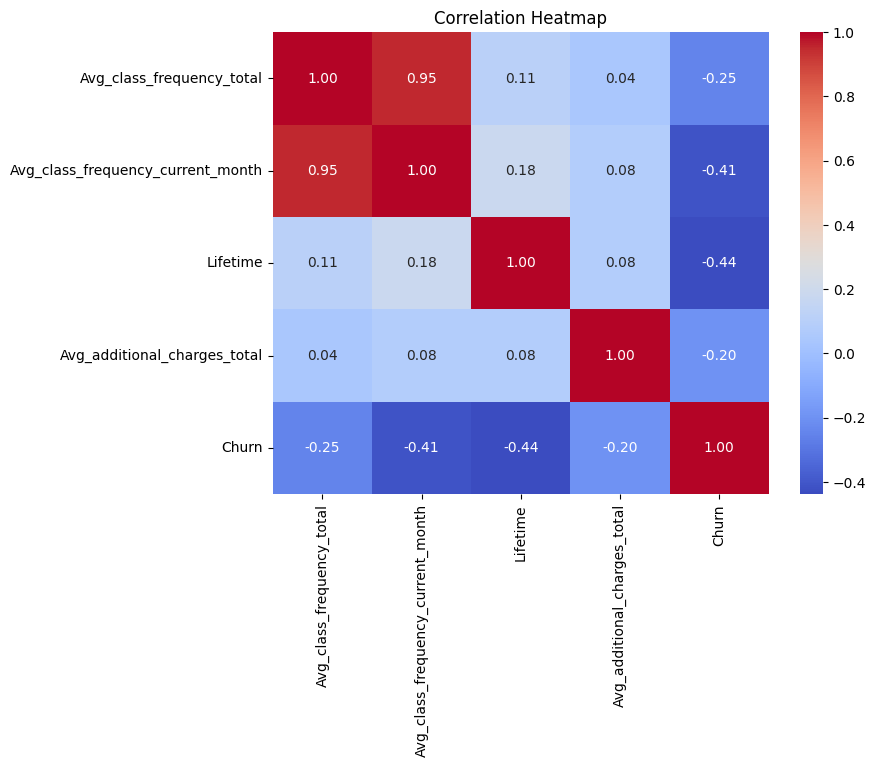

In [13]:
corr = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


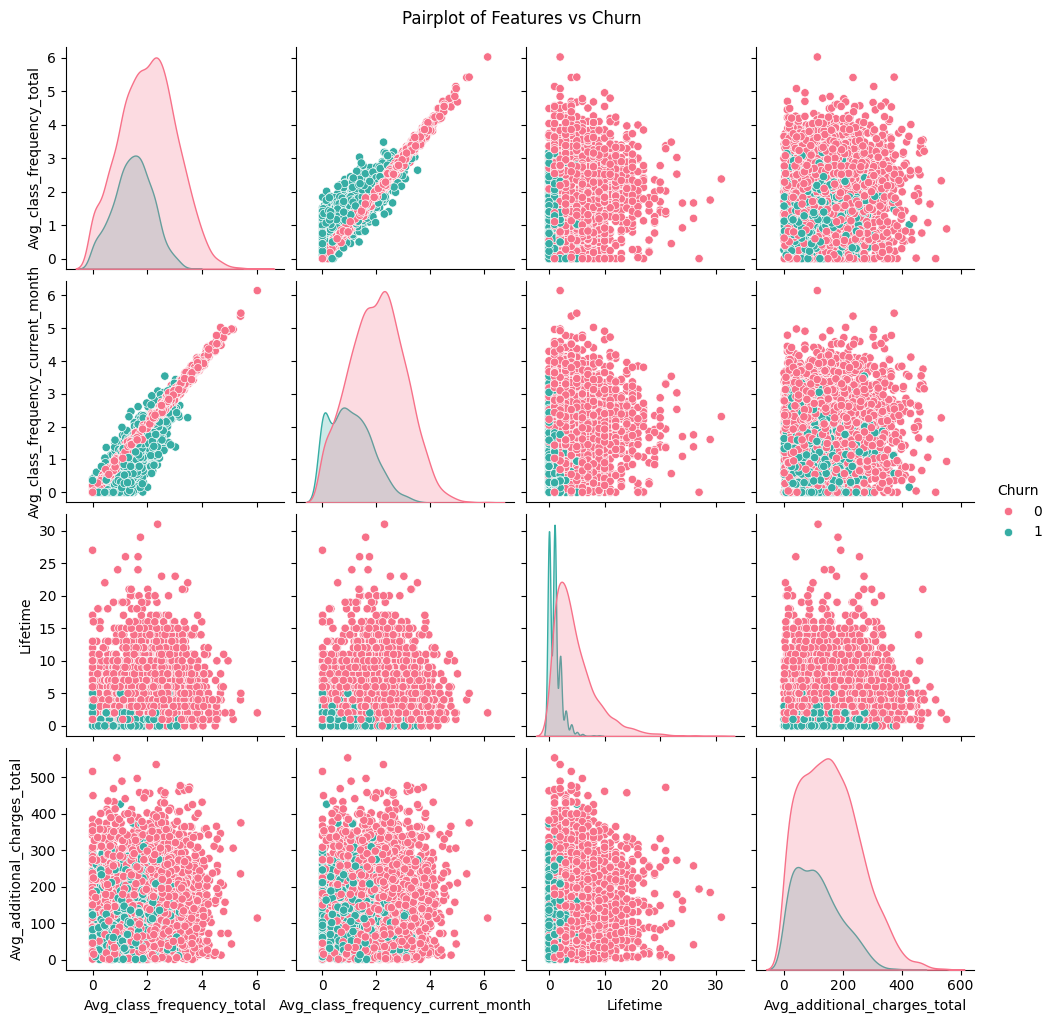

In [14]:
sns.pairplot(selected_data[features + [target]], hue='Churn', palette='husl')
plt.suptitle("Pairplot of Features vs Churn", y=1.02)
plt.show()


In [15]:
# Features and Target

X = data[features]
y = data[target]

# 2. Define models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

#  Loop through models and evaluate using 3-fold Cross Validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Accuracy
    scores = cross_val_score(pipeline, X, y, cv=3, scoring='accuracy')
    print(f"{name} - Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")


Logistic Regression - Accuracy: 0.905 (+/- 0.006)
Decision Tree - Accuracy: 0.889 (+/- 0.009)
Random Forest - Accuracy: 0.916 (+/- 0.004)
SVM - Accuracy: 0.909 (+/- 0.005)


## Observations

- All models achieved very high performance (**above 88%**), suggesting that the dataset is likely clean and the features are highly informative.  
- (**Random Forest**) showed the best accuracy and is likely more stable since it aggregates multiple trees.  
- **Logistic Regression** performed closely and is easier to interpret (coefficients provide clear insights).  
- **Decision Tree** had the lowest performance, likely due to its sensitivity to overfitting if not properly tuned.


##  ROC AUC + Confusion Matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

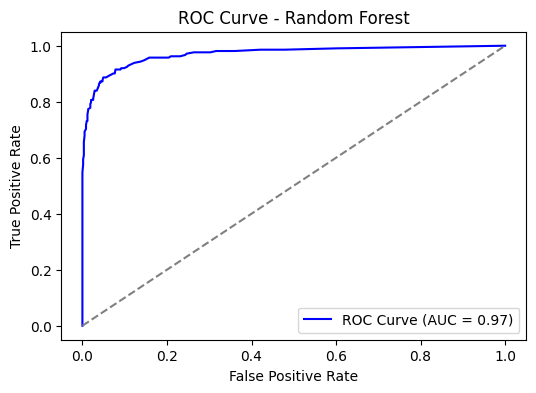

In [17]:
#  ROC Curve
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]  # احتمالات الكلاس 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

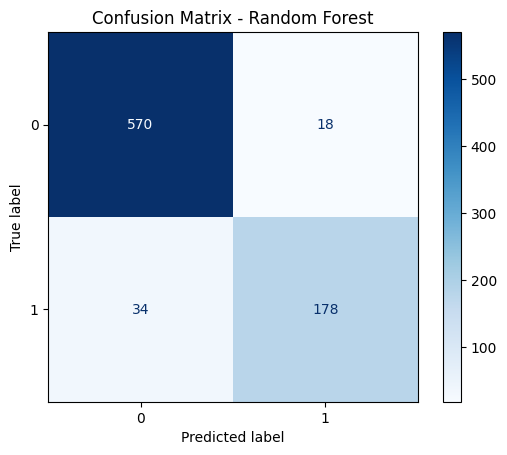

In [18]:
# Confusion Matrix
y_pred = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Hyperparameter Tuning (Random Forest)

In [19]:

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train final model with best params
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9084391427866411


C:\Users\Mohamed Mahmoud\AppData\Local\Temp\ipykernel_12340\301948508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


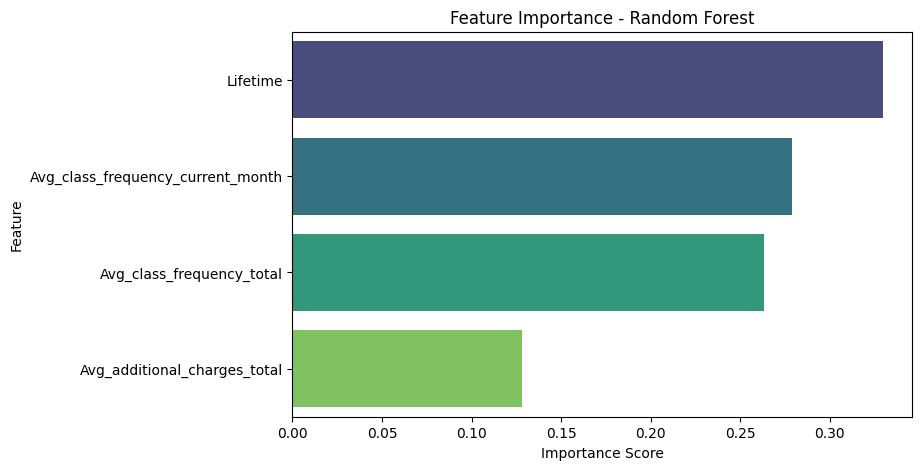

Lifetime                             0.329668
Avg_class_frequency_current_month    0.278974
Avg_class_frequency_total            0.263235
Avg_additional_charges_total         0.128123
dtype: float64


In [20]:
# Get feature importances
feature_importances = pd.Series(
    best_rf.feature_importances_, index=features
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print(feature_importances)


## Feature Insights

### 1. Lifetime (0.329)
- The most influential feature.
- Customers who have been members for a longer time are more predictable in terms of churn risk.
- A sudden drop in engagement from long-term members could be a strong churn indicator.

### 2. Avg_class_frequency_current_month (0.279)
- Represents the customer’s most recent activity.
- A noticeable decrease in current month attendance is a strong sign of potential churn.

### 3. Avg_class_frequency_total (0.263)
- Reflects overall historical engagement with the gym.
- Consistently high attendance over time reduces churn probability.

### 4. Avg_additional_charges_total (0.128)
- Indicates additional investment in gym services (e.g., personal training, supplements).
- Customers spending more on extra services are generally less likely to churn.


In [21]:
import joblib
joblib.dump(best_rf, "random_forest_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']